# Identificar fronteras no lineales

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles, make_blobs
from sklearn.svm import SVC

In [2]:
X, Y = make_circles(100, factor=.1, noise=.1)

In [17]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])

    
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=80, linewidth=1, facecolors = "blue");##vectores de soporte
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [4]:
def plot_svm(N=10, ax=None):
    X, Y = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.6)
    
    X = X[:N]
    Y = Y[:N]
    model = SVC(kernel="linear", C=1E10)
    model.fit(X,Y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:,0], X[:,1], c=Y, s = 50, cmap="autumn")
    ax.set_xlim(-1,4)
    ax.set_ylim(-1,6)
    plt_svc(model, ax)
    

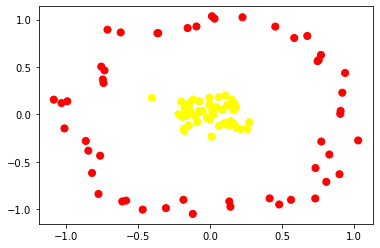

In [5]:
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")

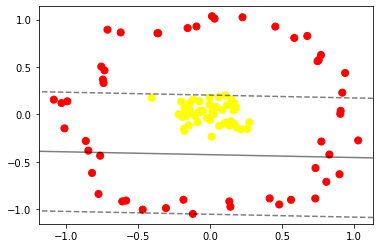

In [6]:
plt.scatter(X[:,0],X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [7]:
r = np.exp(-(X**2).sum(1))
r

array([0.46218235, 0.30084216, 0.99599112, 0.50206255, 0.27154437,
       0.96946691, 0.41786247, 0.99822851, 0.34916024, 0.32257247,
       0.31409825, 0.34550805, 0.42189047, 0.97303566, 0.31956626,
       0.94977403, 0.94014386, 0.42023585, 0.36015491, 0.34238124,
       0.42303009, 0.95543303, 0.96224273, 0.97588846, 0.43000579,
       0.50683856, 0.96907345, 0.38428027, 0.3706439 , 0.99274427,
       0.96941007, 0.96181231, 0.99038923, 0.9816436 , 0.9814595 ,
       0.97903379, 0.94284002, 0.99945537, 0.96443248, 0.42458556,
       0.94639725, 0.42601828, 0.95863452, 0.43919194, 0.37979122,
       0.99387109, 0.82405335, 0.4383032 , 0.3221257 , 0.96462197,
       0.40789591, 0.97686847, 0.31201205, 0.42329066, 0.96269162,
       0.99864692, 0.51853858, 0.29311137, 0.33274228, 0.99497911,
       0.94633124, 0.36745518, 0.96596374, 0.43867151, 0.34303228,
       0.94857612, 0.99670038, 0.98937523, 0.91349019, 0.92221343,
       0.42076862, 0.3277497 , 0.44119834, 0.97407287, 0.32384

In [8]:
from mpl_toolkits import mplot3d

In [9]:
def plot_3D(elev=30, azim=30, X=X,Y=Y):
    ax=plt.subplot(projection="3d")
    ax.scatter3D(X[:,0],X[:,1],r,c=Y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")

In [10]:
from ipywidgets import interact, fixed

In [12]:
interact(plot_3D,elev=[-90,-60,-30,0,30,60,90],
         azim=[-180,-150,-120,90,60,30,0,30,60,90,120,150,180],
         X=fixed(X),Y=fixed(Y),r=fixed(r))

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-0.76294885, -0.43555118],
       [-1.08489738,  0.15545802],
       [-0.05090768,  0.03775375],
       [-0.74399812,  0.36809966],
       [-0.77454667, -0.83887257],
       [-0.00400474,  0.17604801],
       [ 0.74674426,  0.56122718],
       [-0.02187856, -0.0359776 ],
       [-0.81914997, -0.61742826],
       [-0.62020312,  0.86416176],
       [ 0.80772045, -0.71108165],
       [ 0.45329326,  0.92588582],
       [-0.3598246 ,  0.85646705],
       [-0.16446718, -0.01688462],
       [ 0.67555132,  0.82729743],
       [ 0.10654288,  0.20044899],
       [-0.17797303, -0.17334352],
       [-0.36486609,  0.85662823],
       [ 0.03149083,  1.01006404],
       [ 0.01354561,  1.03520381],
       [-0.84507874, -0.3823008 ],
       [ 0.1503254 ,  0.15163402],
       [-0.11738899,  0.15718896],
       [-0.07397505,  0.13760333],
       [-0.18446448, -0.89996081],
       [ 0.77307543, -0.28621168],
       [ 0.13336879, -0.11673749],
       [

In [13]:
#Kernel circular
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

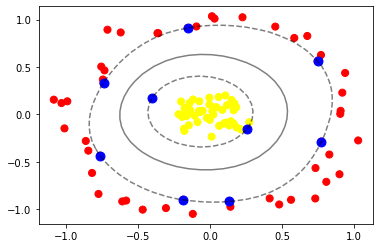

In [18]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1],s=300,lw=1, facecolors="none")

## Ajustar los parámetros de SVM

In [20]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0,cluster_std=1.2)

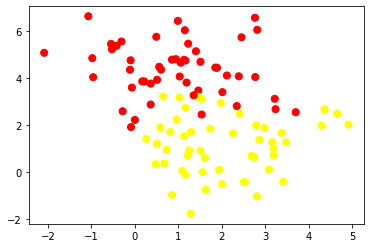

In [21]:
plt.scatter(X[:,0],X[:,1],c=Y, s=50, cmap="autumn")

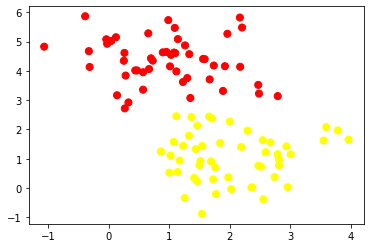

In [23]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0,cluster_std=0.8)
plt.scatter(X[:,0],X[:,1],c=Y, s=50, cmap="autumn")

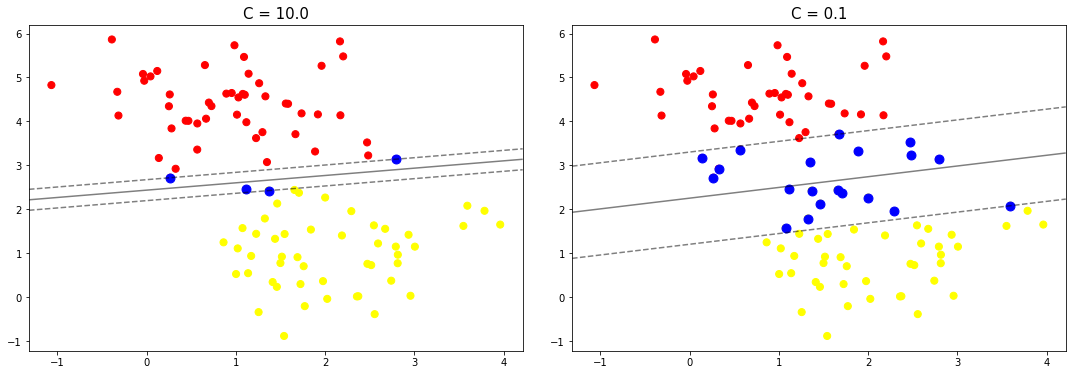

In [26]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.1)

for ax_i, C in zip(ax, [10.0,0.1]):
    model = SVC(kernel="linear",C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1],c=Y,s=50,cmap="autumn")
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size=15)